In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import leidenalg
import igraph as ig
import random
import numpy as np
import cdlib.algorithms

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap', 'bayanpy', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


## **0. Carga del grafo**

In [2]:
start = time.time()

G: nx.Graph = nx.read_graphml("hashtags_cleaned.graphml")

minutos, segundos = divmod(time.time()-start, 60)
print(f"****Tiempo de lectura: {int(minutos)} minutos y {segundos:.2f} segundos****")

****Tiempo de lectura: 0 minutos y 6.47 segundos****


### Subgrafo de prueba

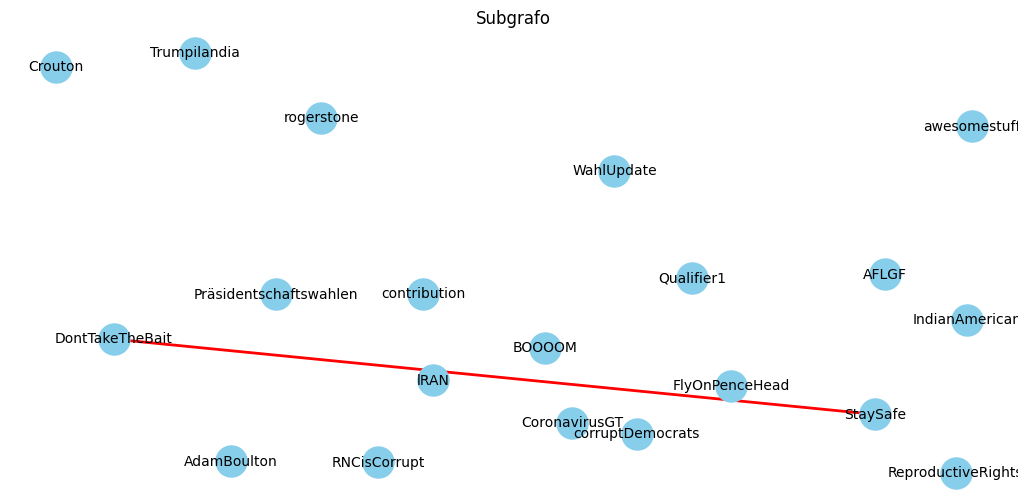

In [287]:
nodos_seleccionados = random.sample(sorted(G.nodes), k=20)

subgrafo = G.subgraph(nodos_seleccionados)
pos = nx.random_layout(subgrafo, seed=33)  # Puedes probar otros layouts como circular_layout

plt.figure(figsize=(13, 6))
nx.draw_networkx_nodes(subgrafo, pos, node_color='skyblue', node_size=500)

nx.draw_networkx_edges(subgrafo, pos, edge_color='red', width=2)
nx.draw_networkx_labels(subgrafo, pos, font_size=10, font_color="black")

plt.title("Subgrafo")
plt.axis("off")
plt.show()

## **1. Cálculo de comunidades**

In [3]:
leiden_comms = cdlib.algorithms.leiden(G).to_node_community_map()
nodes_dict = {k:v[0] for k,v in leiden_comms.items()} # 47544 nodes
communities = list(set(nodes_dict.values())) # n communities

for node in G.nodes: # Add community attribute to each node
    G.nodes[node]["community"] = nodes_dict[node]
for edge in G.edges:
    G.edges[edge]["weight"] = int(G.edges[edge]["weight"])
    
print("Número de comunidades:", len(communities))

Número de comunidades: 55


In [4]:
lista_num_nodos = [len([n for n in G.nodes if G.nodes[n]['community'] == i]) for i in communities]
print(lista_num_nodos[:10]) # comunidades ya ordenadas por número de nodos

[11447, 7431, 7371, 6593, 5757, 2395, 1760, 1354, 1191, 799]


## **2. Representación compacta**

In [5]:
for node in G.nodes:
    print(node, G.nodes[node])
    break
print("****")
for node in G.nodes(data=True):
    print(node)
    break
print("****")
print(G.nodes["Spain"])

Υστερογραφα {'community': 4}
****
('Υστερογραφα', {'community': 4})
****
{'community': 0}


In [6]:
for edge in G.edges:
    print(edge, G.edges[edge])
    break 
print("****")
for edge in G.edges(data=True):
    print(edge)
    break 

('Υστερογραφα', 'Trump') {'weight': 14}
****
('Υστερογραφα', 'Trump', {'weight': 14})


---

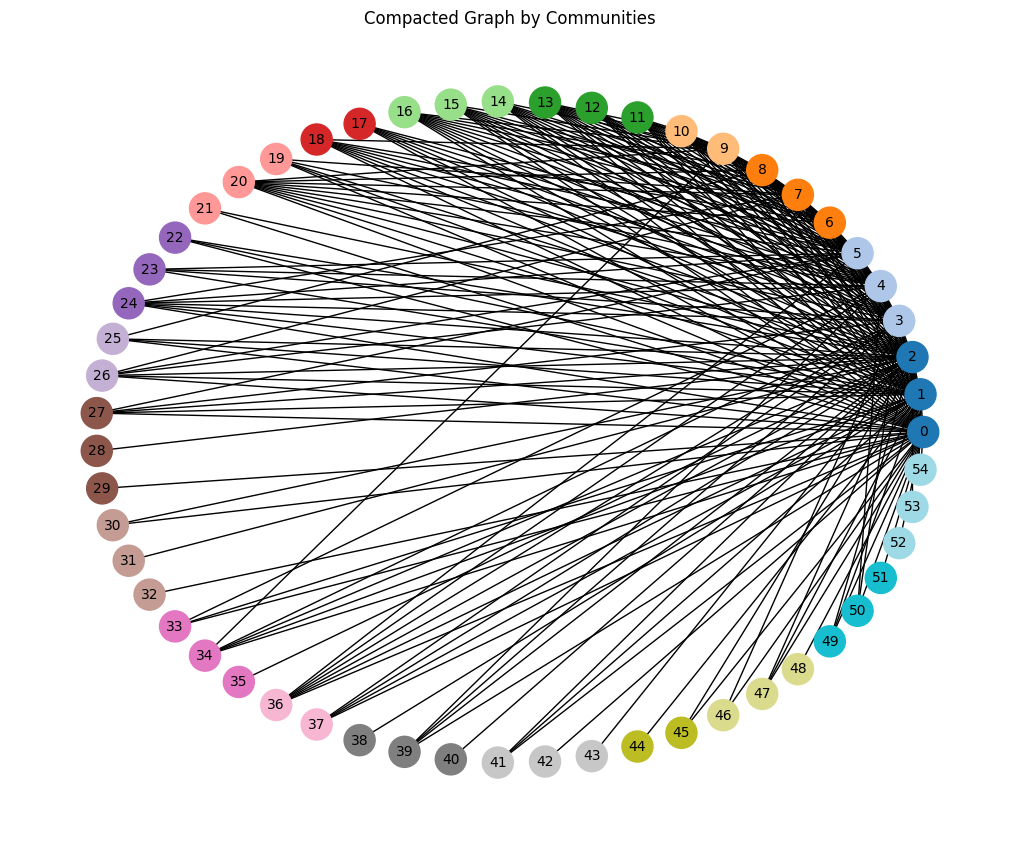

In [47]:
compact_graph = nx.Graph()

for community in communities:
    compact_graph.add_node(community)

for node in compact_graph.nodes():
    compact_graph.nodes[node]['size'] = lista_num_nodos[node]

for u, v in G.edges():
    community_u = nodes_dict[u]
    community_v = nodes_dict[v]
    if community_u != community_v:  # Only add edges between different communities
        if compact_graph.has_edge(community_u, community_v):
            compact_graph[community_u][community_v]['weight'] += G.edges[u, v]['weight']
        else:
            compact_graph.add_edge(community_u, community_v, weight=G.edges[u, v]['weight'])

# Assign a different color to each node
# node_colors = plt.cm.tab20(np.linspace(0, 1, len(communities)))
node_colors = plt.cm.get_cmap("tab20")(np.linspace(0, 1, len(communities)))

# plt.figure(figsize=(15, 12))
plt.figure(figsize=(10, 8))
pos = nx.circular_layout(compact_graph)
nx.draw(compact_graph, pos, with_labels=True, node_size=500, font_size=10, node_color=node_colors)
plt.title("Compacted Graph by Communities")
plt.show()

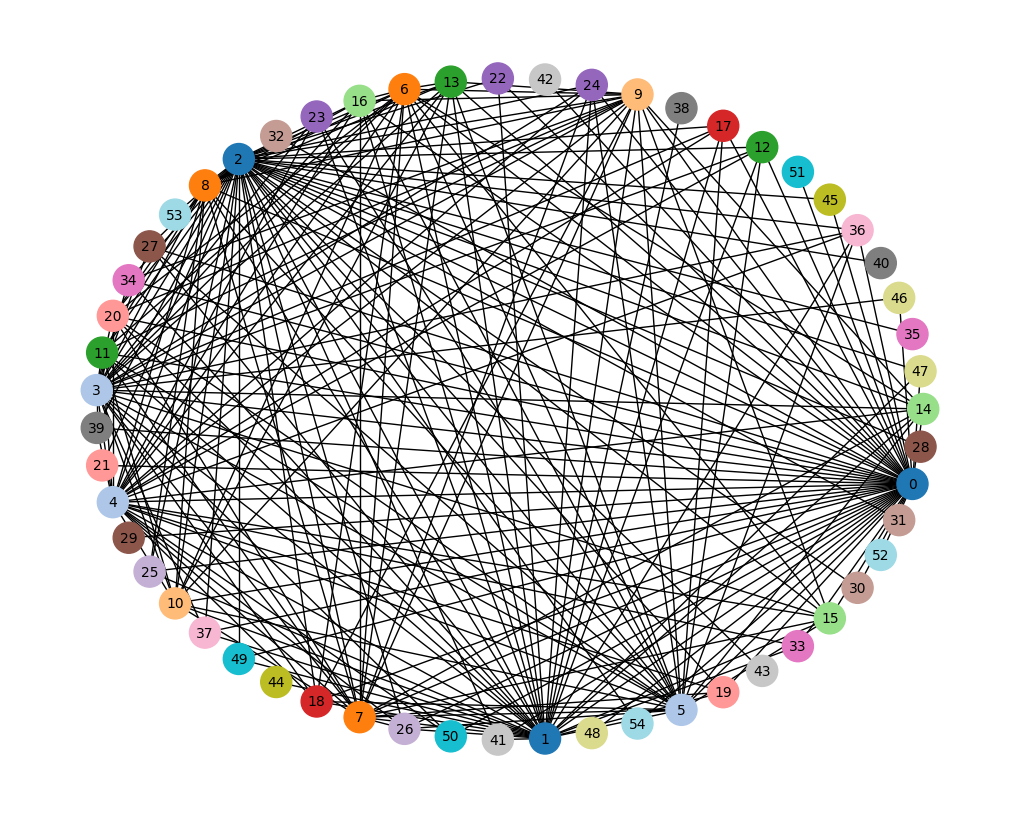

In [30]:
compact_graph = nx.Graph()

for community in communities:
    compact_graph.add_node(community)

for node in compact_graph.nodes():
    compact_graph.nodes[node]['size'] = lista_num_nodos[node]

for u, v in G.edges():
    community_u = nodes_dict[u]
    community_v = nodes_dict[v]
    if community_u != community_v:  # Only add edges between different communities
        if compact_graph.has_edge(community_u, community_v):
            compact_graph[community_u][community_v]['weight'] += G.edges[u, v]['weight']
        else:
            compact_graph.add_edge(community_u, community_v, weight=G.edges[u, v]['weight'])

nodes = list(compact_graph.nodes())
random.shuffle(nodes)

# Create a circular layout with randomized nodes
pos = {}
theta = np.linspace(0, 2 * np.pi, len(nodes), endpoint=False)  # Equally spaced angles
for node, angle in zip(nodes, theta):
    pos[node] = (np.cos(angle), np.sin(angle))  # Position each node on the circle

node_colors = plt.cm.get_cmap("tab20")(np.linspace(0, 1, len(nodes)))

plt.figure(figsize=(10, 8))
nx.draw(compact_graph, pos, with_labels=True, node_size=500, font_size=10, node_color=node_colors)
plt.show()

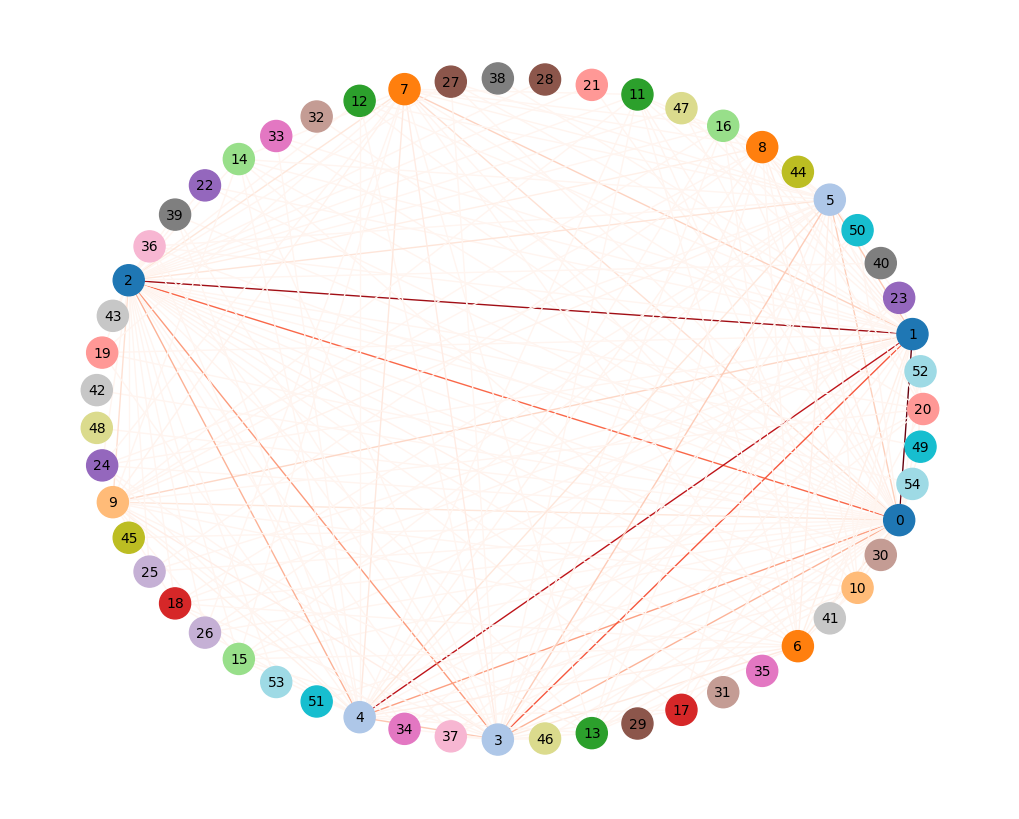

In [45]:
compact_graph = nx.Graph()

for community in communities:
    compact_graph.add_node(community)

for node in compact_graph.nodes():
    compact_graph.nodes[node]['size'] = lista_num_nodos[node]

for u, v in G.edges():
    community_u = nodes_dict[u]
    community_v = nodes_dict[v]
    if community_u != community_v:  # Only add edges between different communities
        if compact_graph.has_edge(community_u, community_v):
            compact_graph[community_u][community_v]['weight'] += G.edges[u, v]['weight']
        else:
            compact_graph.add_edge(community_u, community_v, weight=G.edges[u, v]['weight'])

nodes = list(compact_graph.nodes())
random.shuffle(nodes)

#normalize edge weights
max_weight = max([compact_graph.edges[e]["weight"] for e in compact_graph.edges])
min_weight = min([compact_graph.edges[e]["weight"] for e in compact_graph.edges])
for e in compact_graph.edges:
    compact_graph.edges[e]["weight"] = (compact_graph.edges[e]["weight"] - min_weight) / (max_weight - min_weight)

# Create a circular layout with randomized nodes
pos = {}
theta = np.linspace(0, 2 * np.pi, len(nodes), endpoint=False)  # Equally spaced angles
for node, angle in zip(nodes, theta):
    pos[node] = (np.cos(angle), np.sin(angle))  # Position each node on the circle

node_colors = plt.cm.get_cmap("tab20")(np.linspace(0, 1, len(nodes)))

plt.figure(figsize=(10, 8))
nx.draw(compact_graph, pos, with_labels=True, node_size=500, font_size=10, 
        node_color=node_colors, 
        edge_color=[compact_graph.edges[e]["weight"] for e in compact_graph.edges], 
        edge_cmap=plt.cm.get_cmap("Reds"))
plt.show()

In [49]:
print(compact_graph.get_edge_data(0, 1)) # 0 and 1 are the community nodes

{'weight': 1466338}


## **3. Métricas de comunidades**

### **Modularidad**

In [54]:
G_igraph = ig.Graph.from_networkx(G)
partitions = []
modularities = []
for i in range(10):
    partition = leidenalg.find_partition(G_igraph, leidenalg.ModularityVertexPartition)
    partitions.append(len(partition))
    modularities.append(round(partition.modularity, ndigits=3))

print(f"Nº comunidades: {partitions}")
print(f"Modularidades: {modularities}")

Nº comunidades: [52, 65, 65, 59, 52, 52, 44, 44, 52, 68]
Modularidades: [0.412, 0.414, 0.414, 0.41, 0.414, 0.414, 0.409, 0.409, 0.411, 0.401]


### **Densidad de comunidades**

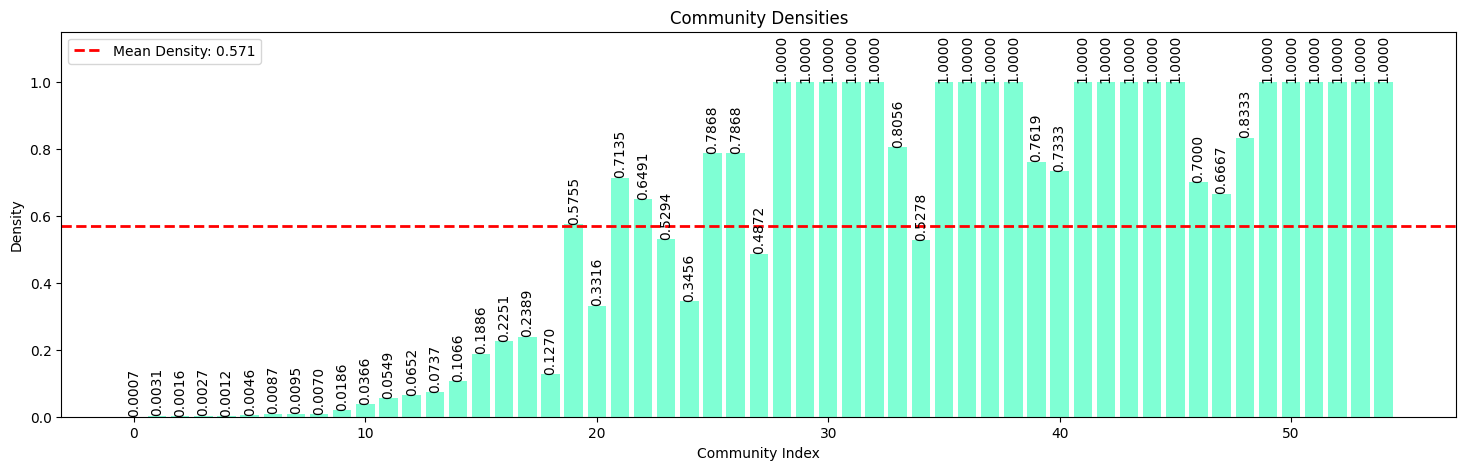

In [ ]:
densities = []
for com_index in communities:
    community_nodes = [node for node, comm in nodes_dict.items() if comm == com_index]
    community_subgraph: nx.Graph = G.subgraph(community_nodes)
    num_nodes = community_subgraph.number_of_nodes()
    num_edges = community_subgraph.number_of_edges()
    if num_nodes <= 1:
        pass  # Avoid division by zero for single-node communities
    density = 2 * num_edges / (num_nodes * (num_nodes - 1))
    densities.append(density)

# ----------------------------------
mean_density = np.mean(densities)
plt.figure(figsize=(18, 5))
bars = plt.bar(communities, densities, color='aquamarine')

# Add density values above each bar
for bar, density in zip(bars, densities):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate: Center of the bar
        bar.get_height(),                  # Y-coordinate: Top of the bar
        f'{density:.4f}',                  
        ha='center',                       
        va='bottom',                       
        rotation=90,                      
        fontsize=10                        
    )

# Adjust ylim to give extra space
plt.ylim(0, max(densities) + 0.15)

plt.axhline(mean_density, color='red', linestyle='--', linewidth=2, label=f'Mean Density: {mean_density:.3f}')
plt.xlabel('Community Index')
plt.ylabel('Density')
plt.title('Community Densities')
plt.legend()
plt.show()

### **Conductancia de comunidades**

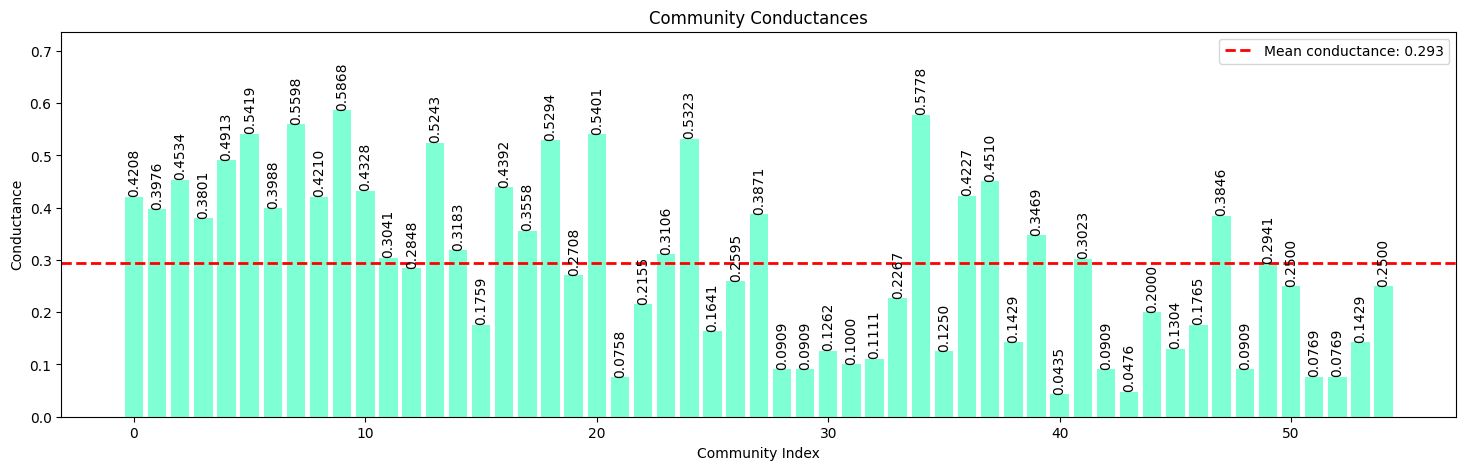

In [112]:
def community_conductance(graph: nx.Graph, community_nodes):
    """Compute the conductance of a community."""
    internal_edges = 0
    boundary_edges = 0

    for node in community_nodes:
        for neighbor in graph.neighbors(node):
            if neighbor in community_nodes:
                internal_edges += 1
            else:
                boundary_edges += 1

    total_edges = internal_edges + boundary_edges
    if total_edges == 0:
        return 1  # Fully disconnected community
    return boundary_edges / total_edges

conductances = []
for com_index in communities:
    community_nodes = [node for node, comm in nodes_dict.items() if comm == com_index]
    conductance = community_conductance(G, community_nodes)
    conductances.append(conductance)

# ----------------------------------
mean_conductance = np.mean(conductances)
plt.figure(figsize=(18, 5))
bars = plt.bar(communities, conductances, color='aquamarine')

for bar, conductance in zip(bars, conductances):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate: Center of the bar
        bar.get_height(),                  # Y-coordinate: Top of the bar
        f'{conductance:.4f}',                  
        ha='center',                       
        va='bottom',                       
        rotation=90,                      
        fontsize=10                        
    )

plt.ylim(0, max(conductances) + 0.15)

plt.axhline(mean_conductance, color='red', linestyle='--', linewidth=2, label=f'Mean conductance: {mean_conductance:.3f}')
plt.xlabel('Community Index')
plt.ylabel('Conductance')
plt.title('Community Conductances')
plt.legend()
plt.show()

### **BLA BLA BLA**